<a href="https://colab.research.google.com/github/wux8es/assignment3/blob/main/Copy_of_assignment_knn_and_kmc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment 3: $k$ Nearest Neighbor and $k$ Means Clustering

## **Do three questions.**

`! git clone https://www.github.com/DS3001/knn`

**Q1.** This question is a case study for $k$ nearest neighbor. The target variable `y` is `Purchase` and the features of interest are `Age` and `AnnualSalary`.

1. Load the `./data/car_data.csv` data. Look at the head and dimensions of the data.
2. Summarize the variables (`User.ID`, `Gender`, `Age`, `AnnualSalary`, `Purchase`). Are there any missings to clean? Convert the `Gender` categorical variable into a dummy variable that takes the value 0 for male and 1 for female. Create a matrix $X$ of predictors including `Age` and `AnnualSalary`, and an outcome $y$ equaling `Purchase`.
3. MaxMin-normalize `Age` and `AnnualSalary` in `X`.
4. Split the sample into a ~80% training dataset and a ~20% testing dataset.
5. Treat this as a classification problem: The model is supposed to predict 0 or 1 for each customer, classifying them as a purchaser or non-purchaser. Use sklearn to determine the optimal number of neighbors $k$ to use.
6. Run the model for the optimal number of neighbors on the testing data. Cross tabulate the predicted outcomes against the actual outcomes; this is called a **confusion matrix**. How often does the model predict a sale when one fails to occur? How often does the model predict no sale when one does occur? Overall, does it provide accurate predictions?
7. Now, compute confusion matrices separately for men and women, as in part 6. Does the model make more accurate predictions for one sex or the other? Explain. (Performance of algorithms on population subgroups is a growing topic in data science.)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving car_data.csv to car_data (1).csv


   User ID Gender  Age  AnnualSalary  Purchased
0      385   Male   35         20000          0
1      681   Male   40         43500          0
2      353   Male   49         74000          0
3      895   Male   40        107500          1
4      661   Male   25         79000          0
Gender: 
 count       1000
unique         2
top       Female
freq         516
Name: Gender, dtype: object 



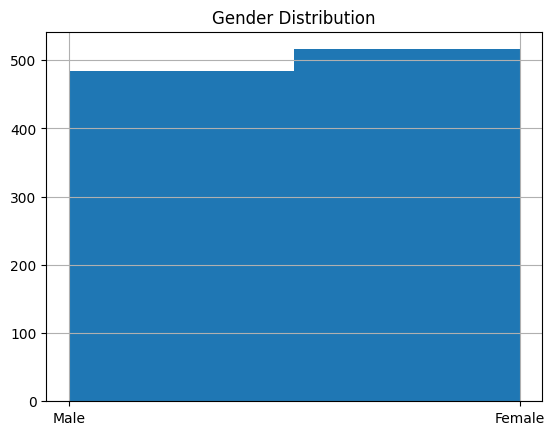

Age: 
 count    1000.000000
mean       40.106000
std        10.707073
min        18.000000
25%        32.000000
50%        40.000000
75%        48.000000
max        63.000000
Name: Age, dtype: float64 



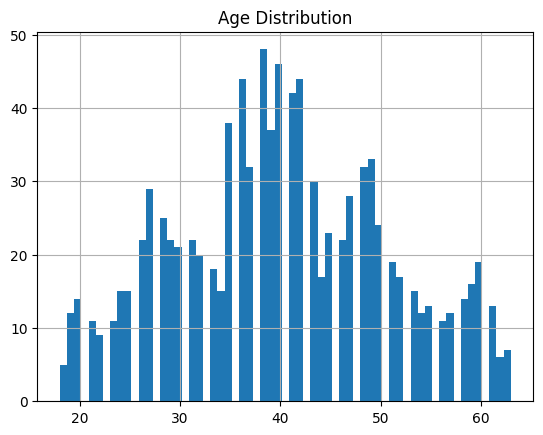

Annual Salary: 
 count      1000.000000
mean      72689.000000
std       34488.341867
min       15000.000000
25%       46375.000000
50%       72000.000000
75%       90000.000000
max      152500.000000
Name: AnnualSalary, dtype: float64 



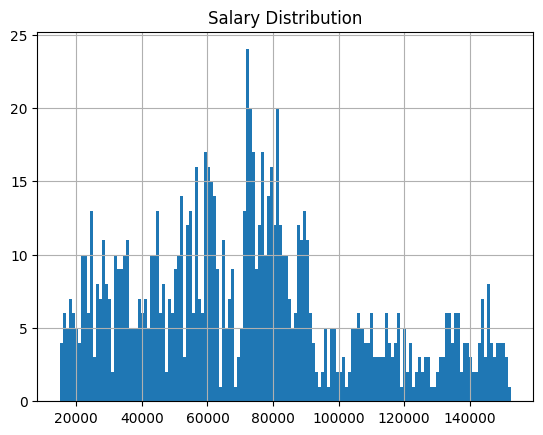

Purchases: 
 count    1000.000000
mean        0.402000
std         0.490547
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: Purchased, dtype: float64 



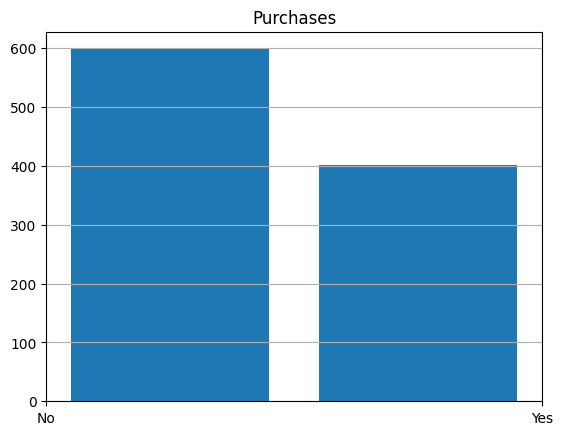

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    1
997    1
998    1
999    1
Name: Gender, Length: 1000, dtype: int64
[ 6 16]


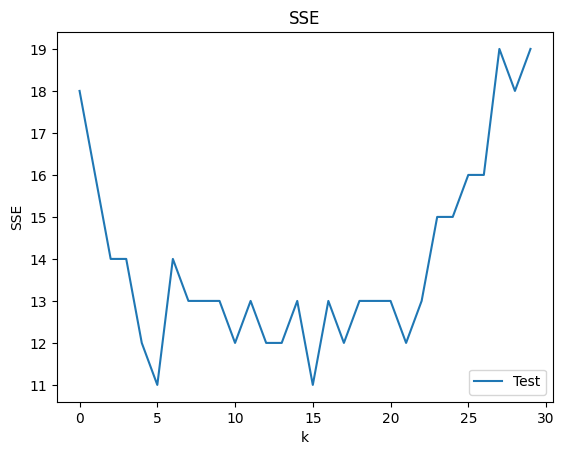

col_0
Purchased


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('./car_data.csv', low_memory = False)
print(df.head())

# Part 1
print('Gender: \n', df['Gender'].describe(),'\n')
df['Gender'].hist(bins=2)
plt.title('Gender Distribution')
plt.show()

print('Age: \n', df['Age'].describe(),'\n')
df['Age'].hist(bins=63)
plt.title('Age Distribution')
plt.show()

print('Annual Salary: \n', df['AnnualSalary'].describe(),'\n')
df['AnnualSalary'].hist(bins=150)
plt.title('Salary Distribution')
plt.show()

print('Purchases: \n', df['Purchased'].describe(),'\n')
df['Purchased'].hist(bins=2, align='mid', rwidth=0.8)
plt.title('Purchases')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
print(df['Gender'])
X = df[['Gender', 'Age', 'AnnualSalary']]
y = df['Purchased']
# Chat GPT helped

# Part 2
X = df[['Age', 'AnnualSalary']].copy()
y = df['Purchased'].copy()

# Part 3
def maxmin(x):
  x = (x-min(x))/(max(x)-min(x))
  return x
X = X.apply(maxmin) # Apply maxmin normalization function to all columns of X

X.describe()

# Part 4
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Part 5
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

plt.title('SSE')
plt.show()

# Optimal k is 9

# Part 6
model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train,y_train)
y_hat = fitted_model.predict(X_test)

pd.crosstab(y_test, y_hat)

# Part 7
from sklearn.model_selection import train_test_split
vars = ['Age','AnnualSalary','Gender']
X = df.loc[:,vars]
y = df['Purchased']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1)

model = KNeighborsClassifier(n_neighbors=9)
fitted_model = model.fit(X_train.drop('Gender',axis=1),y_train)
y_hat = fitted_model.predict(X_test.drop('Gender',axis=1))

y_hat_M = y_hat[ X_test['Gender'] == 'Male']
y_hat_F = y_hat[ X_test['Gender'] == 'Female']
y_M = y_test[ X_test['Gender'] == 'Male']
y_F = y_test[ X_test['Gender'] == 'Female']

pd.crosstab(y_F, y_hat_F)


**Q2.** This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm for regression and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the Sum of Squared Error and make a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving USA_cars_datasets.csv to USA_cars_datasets.csv


   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
      price      year   mileage
0      6300  0.744681  0.269287
1      2899  0.808511  0.187194
2      5350  0.957447  0.038892
3     25000  0.872340  0.063016
4     27700  0.957447  0.006537
...     ...       ...       ...
2494   7800  0.978723  0.023193
2495   9200  0.957447  0.033944
2496   9200  0.957447  0.031037
2497   9200  0.957447  0.031983
2498   9200  0.957447  0.030818

[2499 rows x 3 columns]


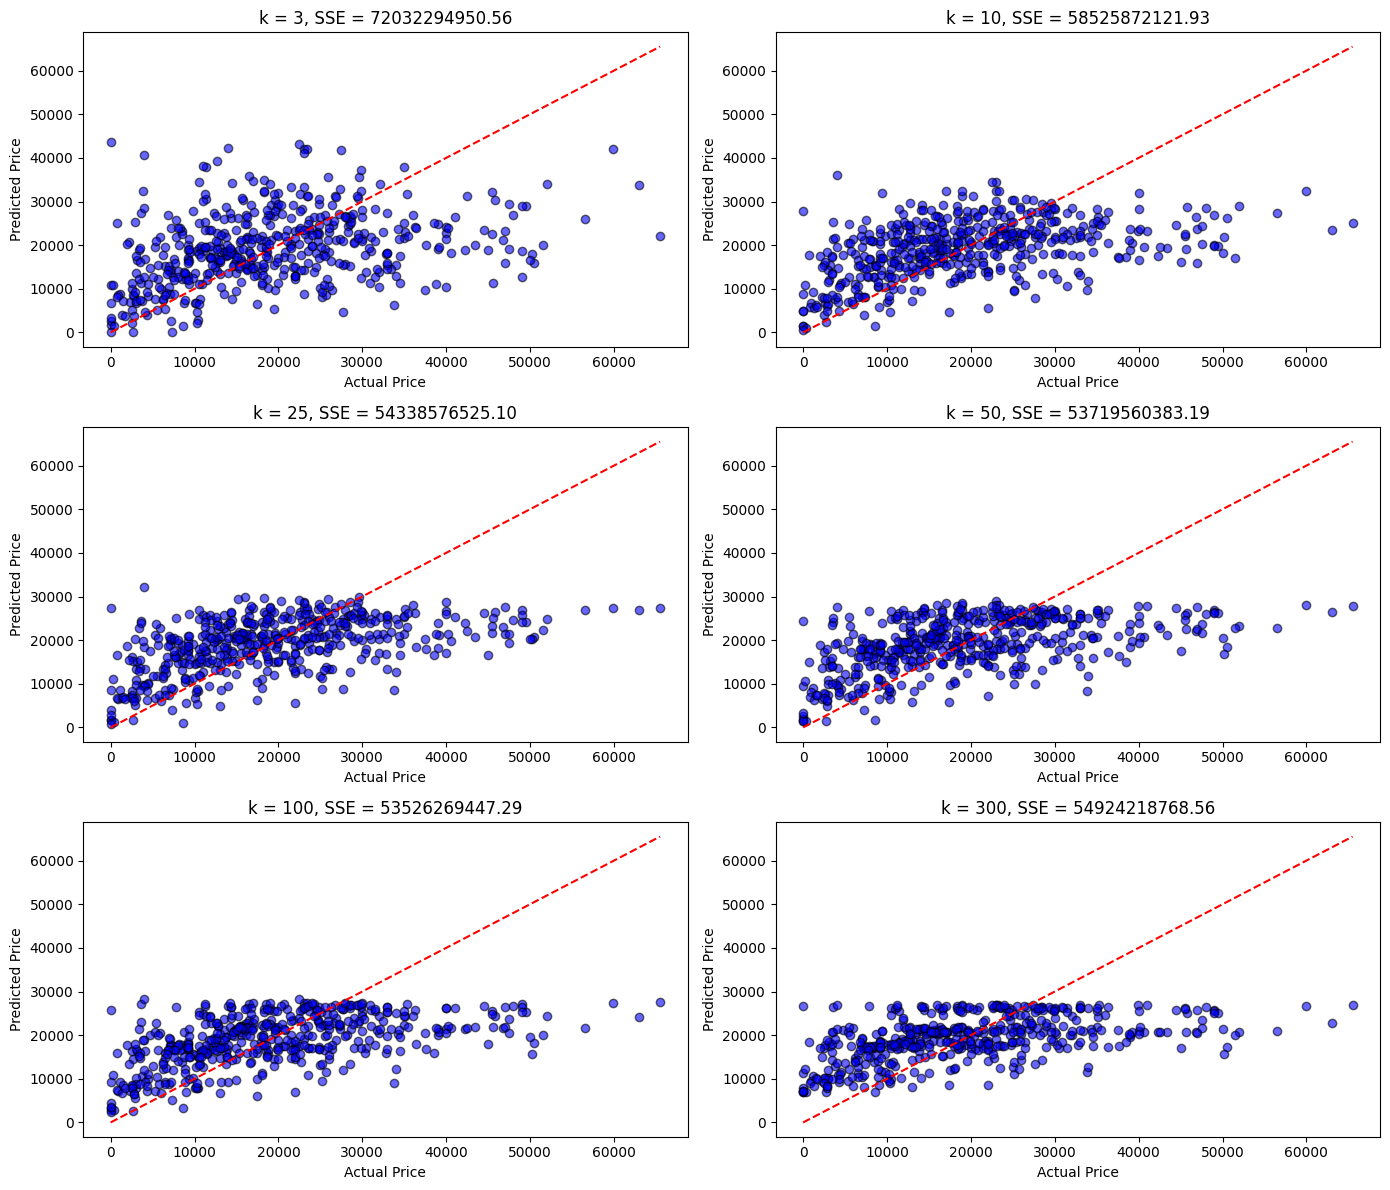

[2]


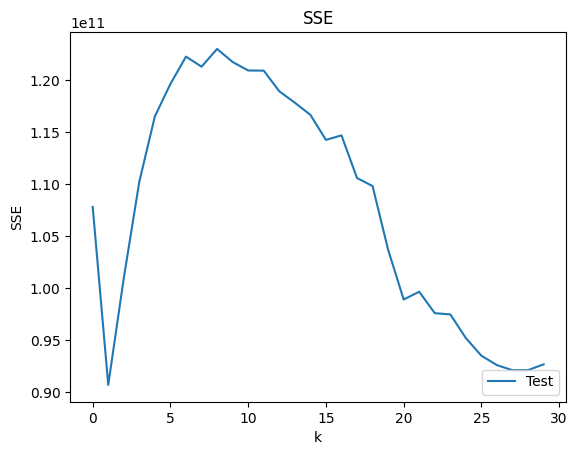

In [ ]:
# Part 1
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('./USA_cars_datasets.csv', low_memory = False)
df = df.drop(columns=['brand', 'model','title_status','color','vin','lot','state','country', 'condition','Unnamed: 0'])
print(df.head())

# Part 2
# Chat GPT helped

def maxmin(x):
    return (x - x.min()) / (x.max() - x.min())
df[['year', 'mileage']] = df[['year', 'mileage']].apply(maxmin)
print(df)

# Part 3
# Chat GPT helped
from sklearn.model_selection import train_test_split

X = df[['year', 'mileage']].copy()
y = df['price'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Part 4
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# ChatGPT code chunk (with some edits)

k_values = [3, 10, 25, 50, 100, 300]
sse_values = []

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))

axes = axes.flatten()

for idx, k in enumerate(k_values):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    sse = np.sum((y_pred - y_test)**2)
    sse_values.append(sse)

    axes[idx].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.6)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    axes[idx].set_title(f"k = {k}, SSE = {sse:.2f}")
    axes[idx].set_xlabel("Actual Price")
    axes[idx].set_ylabel("Predicted Price")

plt.tight_layout()
plt.show()

#As k increases, the data becomes harder to correctly predict

# Part 5
# Chat GPT helped
k_bar = 30
k_grid = np.arange(1,k_bar)
SSE = np.zeros(k_bar)
for k in range(k_bar):
  model = KNeighborsClassifier(n_neighbors=k+1)
  fitted_model = model.fit(X_train,y_train)
  y_hat = fitted_model.predict(X_test)
  SSE[k] = np.sum( (y_test-y_hat)**2 )

SSE_min = np.min(SSE)
min_index = np.where(SSE==SSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),SSE,label='Test')
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='lower right')

plt.title('SSE')
plt.show()

# The best k value looks to be around 3

# Part 6

#If the k value is too small, the model may be overfitting (not able to generalize well and is to close to the dataset), and underfitting occurs at higher k values where the model is overly general).


**Q3.** This question is a case study for $k$ nearest neighbor, particularly variable selection. The data for the question include (summaries reproduced here directly from the codebook):

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables better, in this case? Explain your findings.

**Q4.** Let's do some very basic computer vision. We're going to import the MNIST handwritten digits data and $k$NN to predict values (i.e. "see/read").

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use the reshaped `X_test` and `y_test` data to create a $k$-nearest neighbor classifier of digit. What is the optimal number of neighbors $k$? If you can't determine this, play around with different values of $k$ for your classifier.
5. For the optimal number of neighbors, how well does your predictor perform on the test set?
6. So, this is how computers "see." They convert an image into a matrix of values, that matrix becomes a vector in a dataset, and then we deploy ML tools on it as if it was any other kind of tabular data. To make sure you follow this, invent a way to represent a color photo in matrix form, and then describe how you could convert it into tabular data. (Hint: RGB color codes provide a method of encoding a numeric value that represents a color.)

**Q5.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q6.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.
4. Explain the intuition of the elbow, using this numerical simulation as an example.

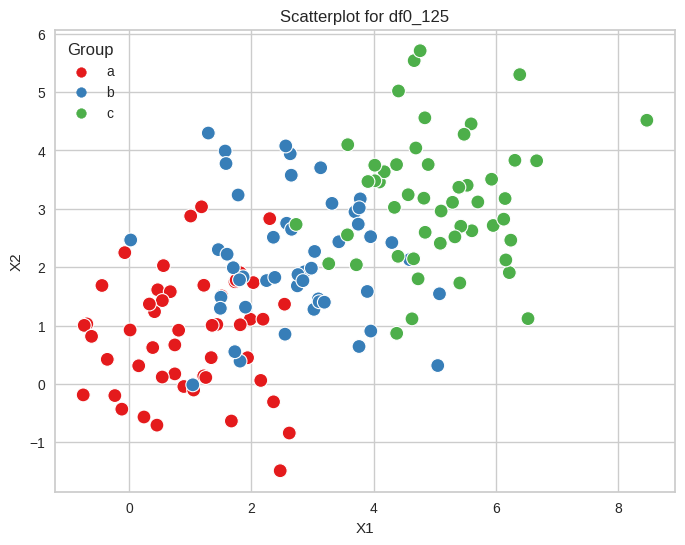

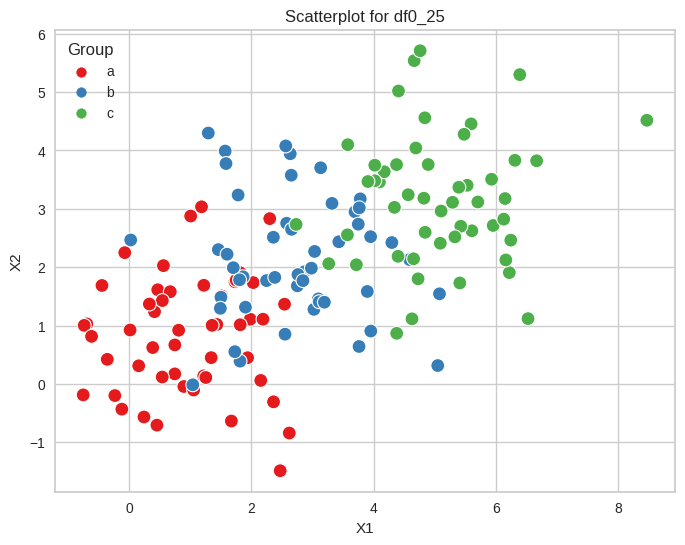

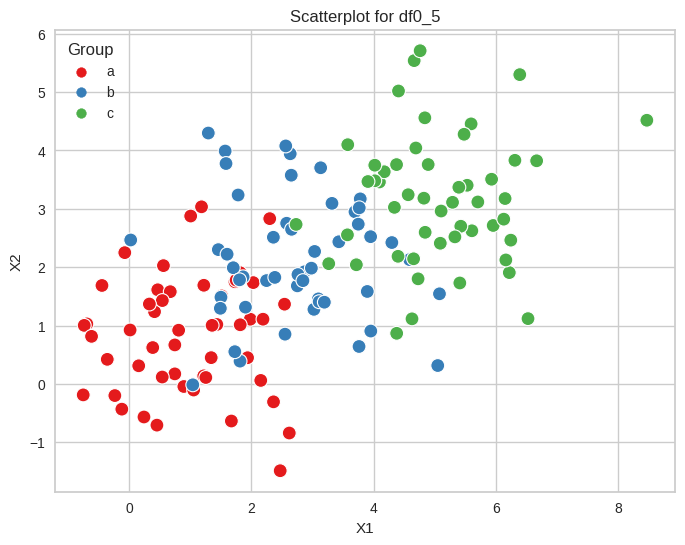

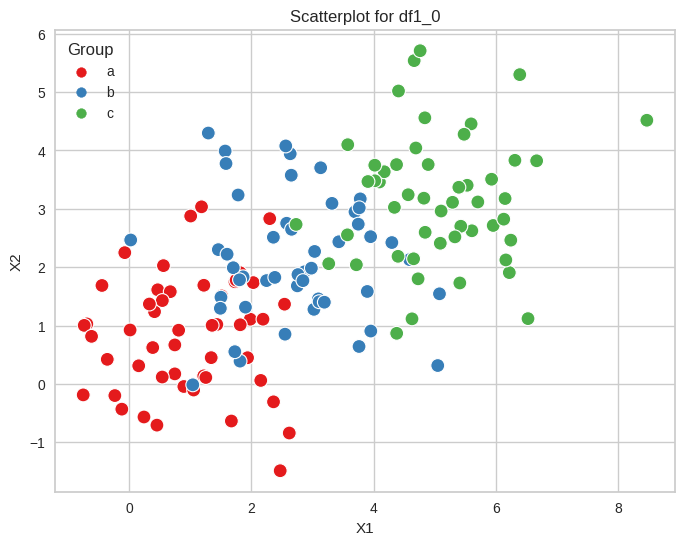

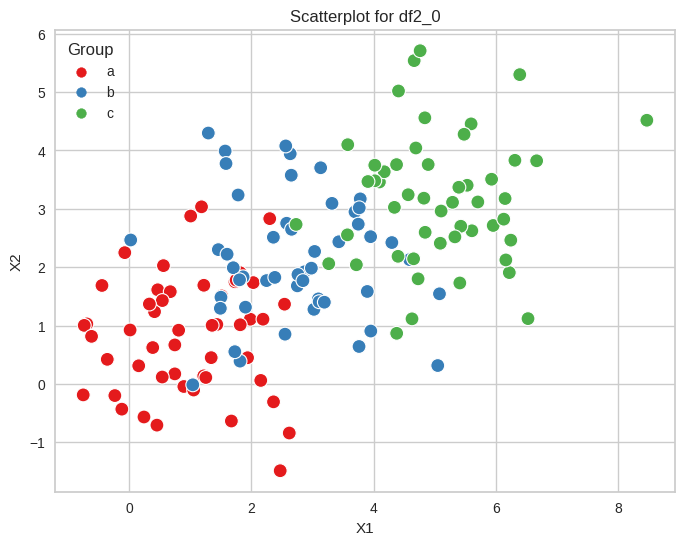

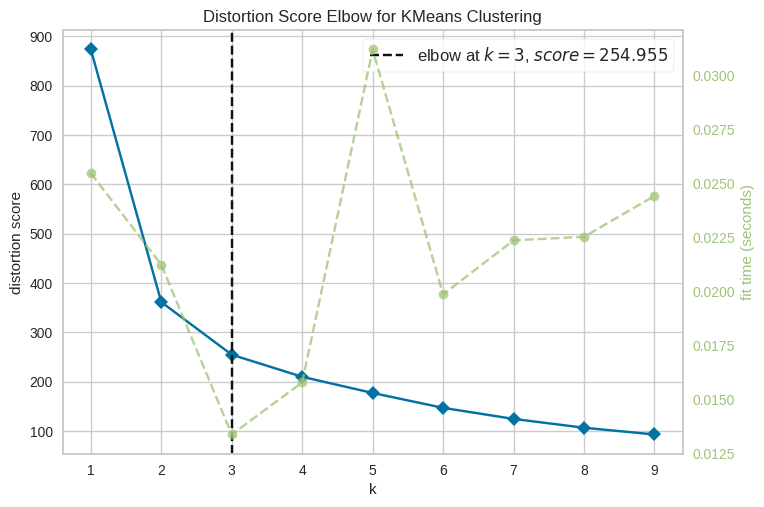

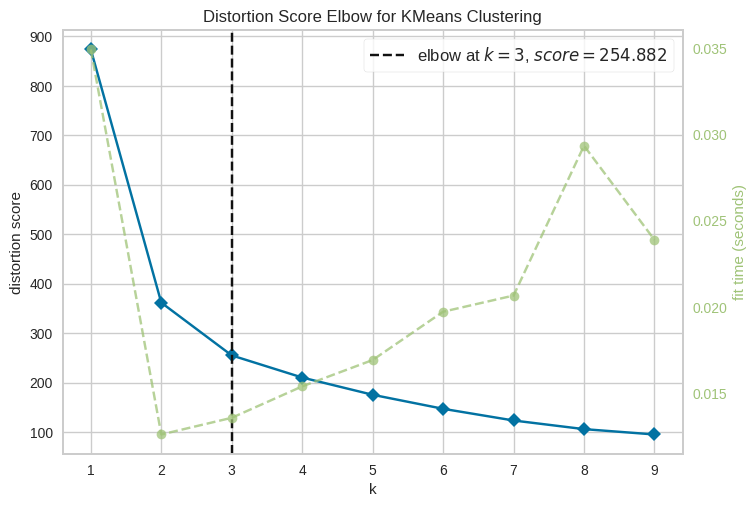

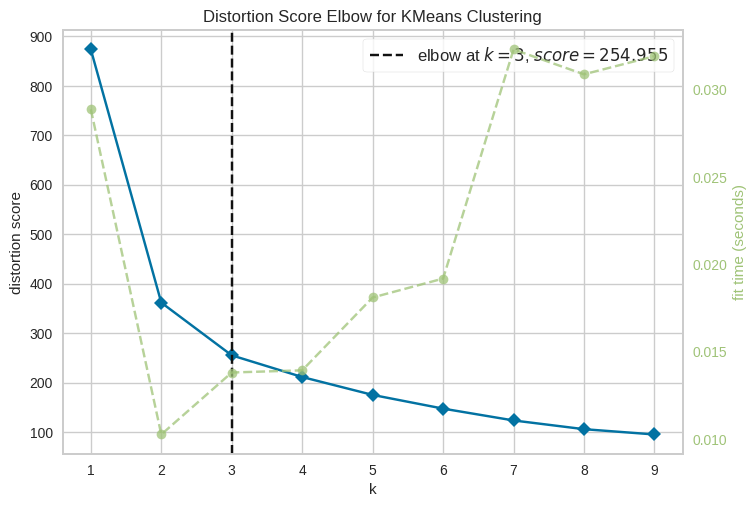

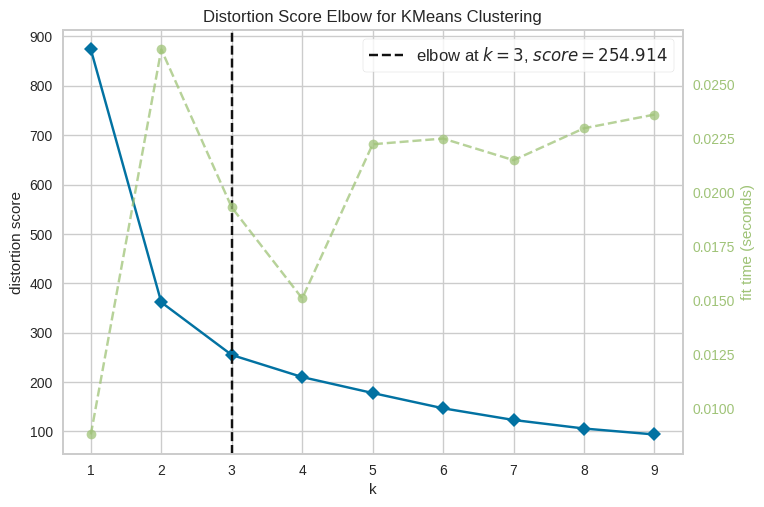

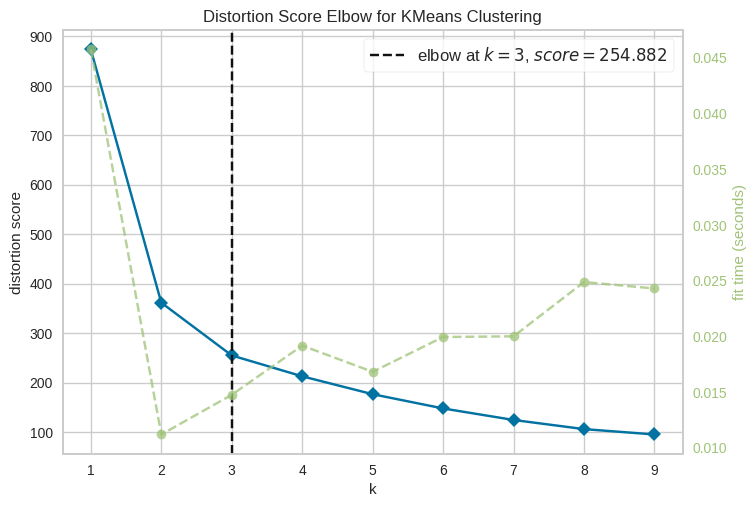

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,1,N),np.random.normal(1,1,N)])
    X2 = np.array([np.random.normal(3,1,N),np.random.normal(2,1,N)])
    X3 = np.array([np.random.normal(5,1,N),np.random.normal(3,1,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

# Part 2
# Chat GPT created the scatterplots, screeplots, and helped me interpret them

def create_scatterplot(df, title):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='x1', y='x2', hue='group', palette='Set1', s=100)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(title='Group')
    plt.show()


create_scatterplot(df0_125, 'Scatterplot for df0_125')
create_scatterplot(df0_25, 'Scatterplot for df0_25')
create_scatterplot(df0_5, 'Scatterplot for df0_5')
create_scatterplot(df1_0, 'Scatterplot for df1_0')
create_scatterplot(df2_0, 'Scatterplot for df2_0')

# The points become less distinct

# Part 3
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

def create_scree_plot(df, title):
    model = KMeans(n_init=10)
    visualizer = KElbowVisualizer(model, k=(1, 10))
    visualizer.fit(df[['x1', 'x2']])
    visualizer.show(title=title)

create_scree_plot(df0_125, 'Scree Plot for df0_125')
create_scree_plot(df0_25, 'Scree Plot for df0_25')
create_scree_plot(df0_5, 'Scree Plot for df0_5')
create_scree_plot(df1_0, 'Scree Plot for df1_0')
create_scree_plot(df2_0, 'Scree Plot for df2_0')

# It is easier to find a clear elbow at lower noise values, making it easier to find k

# Part 4
# The elbow point is when adding more clusters is not helpful (does not reduce overall variation in clusters).


**Q7.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?